In [36]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import scipy.integrate as integrate
import random

# Segundo Exercício Programa

Guilherme Feulo do Espirito Santo - Nusp: 6431749

Vinicius Pessoa Duarte - Nusp: 8941943

### Objetivo

Neste exercício programa devemos programa uma função que dados $m-1$ pares $(x_i,y_i)$, encontra os coeficientes $a_i$ que minimizam o critério:

$$ f(a) = \sum_{l=0}^m (s_a(t_l) - y_l)^2 + \lambda \int_0^n (s_a''(t))^2 dt$$

onde:

$$ s_a(t) = \sum_{i=0}^n a_i \beta(t-i) $$

### implementação de $\beta$ e $\beta''$

temos que como visto em aula as funções $\beta$ e $\beta'$ são definidas por:

$$ \beta(t) = 
    \begin{cases}
        0 & \text{se } t < -2 \\
        \frac{1}{4}(t+2)^3 & \text{se } -2 \leq t < -1 \\
        -\frac{3}{4} t^3 - \frac{3}{2} t^2 + 1 & \text{se } -1 \leq t < 0 \\
        \frac{1}{4}t^3 - \frac{3}{2} t^2 + 1 & \text{se } 0 \leq t < 1 \\
        \frac{1}{4}(2-t)^3 & \text{se } 1 \leq t < 2 \\
        0 & \text{se } t > 2 
     \end{cases}
$$

$$ \beta''(t) = 
    \begin{cases}
        0 & \text{se } t < -2 \\
        \frac{3}{2}(t+2) & \text{se } -2 \leq t < -1 \\
        -\frac{9}{2} t - 3  & \text{se } -1 \leq t < 0 \\
        \frac{9}{2} - 3& \text{se } 0 \leq t < 1 \\
        \frac{3}{2}(2-t) & \text{se } 1 \leq t < 2 \\
        0 & \text{se } t > 2 
     \end{cases}
$$

Ambas as funções são implementadas abaixo

In [2]:
#implementa a função beta(t) como definida
def beta(t):
    if t < 0:
        return beta(-1*t)
    if t < 1:
        return (0.75*t-1.5)*t*t +1
    if t < 2:
        return 0.25 * (2-t)*(2-t)*(2-t)
    else:
        return 0

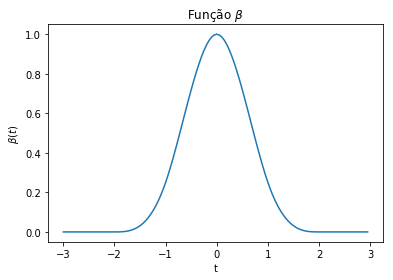

In [3]:
t = np.arange(-3,3,.05)
y = np.array(list(map(beta, t)))
plt.plot(t,y)
plt.title(r'Função $\beta$')
plt.xlabel('t')
plt.ylabel(r'$\beta(t)$')
plt.show()

In [4]:
#implemeta beta''(t)

def d2_beta(t):
    if t < 0:
        return d2_beta(-1*t)
    if t < 1:
        return 4.5*t-3
    if t < 2:
        return 1.5*(2-t)
    else:
        return 0

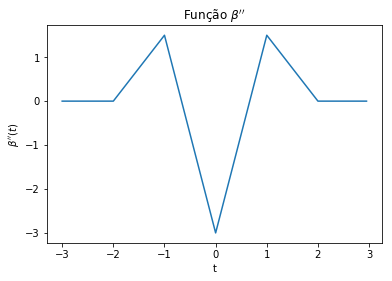

In [6]:
t = np.arange(-3,3,.05)
y = np.array(list(map(d2_beta, t)))
plt.plot(t,y)
plt.title(r"Função $\beta''$")
plt.xlabel('t')
plt.ylabel(r"$\beta''(t)$")
plt.show()

### Encontrando os $a_i$

Como visto em sala podemos encontrar $a = [a_o, a_1, \ldots, a_{n-1}]$ resolvendo $f'(a) = 0$ o que é alcançado resolvendo o sistema linear:

$$ (B^tB + \lambda M) a = B^ty $$

onde: 

$$b_{i,j} = \beta(t_i - j)$$ 
e
$$m_{i,j} = \int_0^n \beta''(t-i) \beta(t-j) dt$$

In [7]:
#função que dados x e n calcula a matriz B
def create_B(x,n):
    b =np.zeros([len(x),n])
    for i,x_i in enumerate(x):
        for j in range(n):
            if(abs(x_i-j)<2):
                b[i][j] = beta(x_i - j)
    return b

In [8]:
#função que dado n calula a matriz M
def create_M(n):
    m = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if abs(i-j) < 4:
                m[i][j] = integrate.quad(lambda t: d2_beta(t-i)*d2_beta(t-j), 0, n)[0]
    return m

In [68]:
#Função que calcula os coeficientes a_i com base no sistema descrito 
def generate_coefs(x,y,l=0):
    assert(len(x)==len(y))
    n = int(np.ceil(max(x))) + 1
    B = create_B(x,n)
    M = create_M(n)
    b = B.transpose().dot(B) + l*M
    e = B.transpose().dot(y)
    coef = inv(b).dot(e)
    return coef

### Teste da implementação

Testamos a implementação gerando pontos a partir de curvas conhecidas (com e sem ruído) e calculando a função interpoladora para comparação

##### Exemplo 1: curva do exercício 3 da lista

In [69]:
#função que dado a lista dos coeficientes cria a função s correspondente
def create_s(a):
    def s(t):
        value = 0
        for i,c in zip(range(len(a)),a):
            value += c*beta(t-i)
        return value
    return s

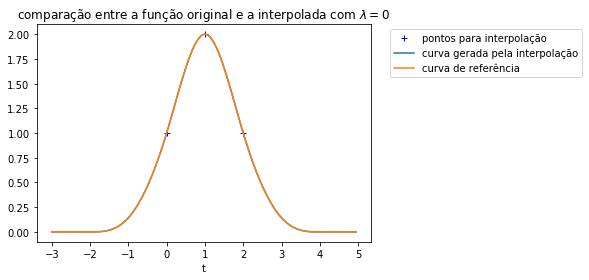

In [81]:
#pontos do enunciado
x = [0,1,2]
y = [1,2,1]
lbda = 0
# gera os coeficientes e s_a(t)
a = generate_coefs(x,y,l=lbda)
s = create_s(a)
#coeficientes calculados na resolução do item 3 da lista 3
coef_ref = [4/7,12/7,4/7] 
s_ref = create_s(coef_ref)
#calcula as curvas para o plot
t = np.arange(-3,5,.05)
y_ref = np.array(list(map(s_ref, t)))
y_interpolado = np.array(list(map(s, t)))
#plot
plt.plot(x,y,'b+', label="pontos para interpolação")
plt.plot(t,y_interpolado,label="curva gerada pela interpolação")
plt.plot(t,y_ref,label="curva de referência")
plt.title(r"comparação entre a função original e a interpolada com $\lambda = %d$" % lbda)
plt.xlabel('t')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

##### Exemplo 2: curva gerada a partir de vários splines somados com ruído 

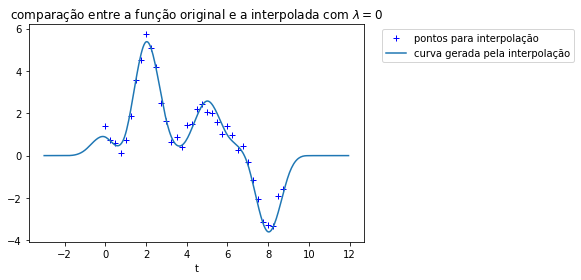

In [89]:
#cria pontos (x,y) oriundos de uma função que soma splines + ruido
coef = [1,-1,5,0,0,2,0,0,-4]
s_ref = create_s(coef)
x = np.arange(0,9,.25)
y = np.array(list(map(s_ref, x))) + np.random.random_sample(len(x))

#calcula os coeficientes com bas nos pontos informados
lbda = 0#lambda pode ser variado para analisar comportamento
a = generate_coefs(x,y,l=lbda)
# cria a curva para o plot
s = create_s(a)
t = np.arange(-3,12,.05)
y_interpolado = np.array(list(map(s, t)))
#plot
plt.plot(x,y,'b+', label="pontos para interpolação")
plt.plot(t,y2,label="curva gerada pela interpolação")
plt.title(r"comparação entre a função original e a interpolada com $\lambda = %d$" % lbda)
plt.xlabel('t')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()